# Life Expectancy Prediction of Countries

<a id='outline'></a>

### Outline


<b> 1. [Introduction](#intro) <br><br>
2. [Importing Libraries and Data](#import) <br><br>
3. [Exploratory Data Analysis](#analysis) <br>
</b>3.1. [DataFrame Description](#analysis-1) <br>
3.2. [Data Distribution](#analysis-2)<br><br>
<b>4. [Data Preprocessing](#preprocessing) <br>
</b>4.1. [Handling Missing Values](#preprocessing-1) <br>
4.2. [Encoding Categorical Features](#preprocessing-2)<br>
4.3. [Scaling Data](#preprocessing-3)<br><br>
<b>5. [Creating ML Models](#mlmodels) <br>
</b>5.1. [Regression Models](#mlmodels-1) <br>
5.2. [Model Tuning](#mlmodels-2)<br>
5.3. [Feature Importance](#mlmodels-3)<br><br>
<b>6. [Making Pipeline](#pipeline) <br><br>
7. [Conclusion](#conclusion) <br>
</b>

<br><br>

<a id='intro'></a>

## 1. Introduction

**Motivation**

The previous research on factors affecting life expectancy has mainly focused on demographic variables, income composition, and mortality rates. However, the impact of immunization and human development index was not taken into account in those studies. Moreover, some research conducted in the past employed multiple linear regression based on data sets of one year for all countries. This gap in knowledge provides motivation for developing a regression model using mixed effects and multiple linear regression methods, while analyzing data from 2000 to 2015 for all countries. This study will consider essential immunizations such as Hepatitis B, Polio, and Diphtheria, as well as mortality, economic, social, and other health-related factors. Since this dataset comprises observations from different countries, it will be easier for countries to determine the predictive factor that contributes to a lower life expectancy. This information will help countries identify which areas require attention to efficiently improve the life expectancy of their population.

**Dataset**

The accuracy of data is crucial for the success of the project. The Global Health Observatory (GHO) data repository, maintained by the World Health Organization (WHO), tracks the health status and related factors of all countries. These data sets are available to the public for health data analysis. The life expectancy and health-related factors data for 193 countries were collected from the WHO data repository website, while the economic data was collected from the United Nations website. Only critical health-related factors that are more representative were selected from all categories. The health sector has experienced significant development in the past 15 years, resulting in improved human mortality rates, especially in developing countries compared to the past 30 years. Therefore, this project analyzed data from 2000 to 2015 for 193 countries. The individual data files were merged into a single data set, but some missing values were observed upon initial visual inspection. As the data sets were from the WHO, no evident errors were found. Missing data were handled using the Missmap command in the R software. The results showed that most of the missing data was for population, Hepatitis B, and GDP. The missing data were mainly from less-known countries such as Vanuatu, Tonga, Togo, and Cabo Verde. Finding all data for these countries was challenging, and therefore, it was decided to exclude them from the final model data set. The final merged file (final dataset) contains 22 columns and 2938 rows, representing 20 predicting variables, which were divided into several broad categories: immunization-related factors, mortality factors, economic factors, and social factors.

https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

**RoadMap**

<li>We begin our work as usual by importing libraries and dataset. 
<li>We make exploratory data analysis to get familiar with the data. The data will be cleaned along the way. 
<li>Then, we will predict insurance charges using various regression algoritms, e.g., <b>ElasticNet, KNN Regressor, SVM, MLP Regressor (Neural Network), Decision Tree, Bagging, RandomForest, ADABoost, GradientBoosting, XGBoost, LGBM</b> and <b>CatBoost Regressors</b>. 
<li>Based on the results, the best performing imputer will be selected and the best performing regressors will be tuned to improve our score.
<li><b>Pipeline</b> is utilized to automate all preprocessing and modelling steps and giving a new sample returns an output instantly. When this pipeline is integrated to a system, it can show a prediction of insurance charge automatically.

<br>[Return to the Outline](#outline) <br>

<br><br>

<a id='import'></a>

## 2. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [2]:
data = pd.read_csv("life_expectancy_data.csv")

In [117]:
# Copying the dataframe to keep the original unspoiled.
df = data.copy()

<br>[Return to the Outline](#outline) <br>

<br><br>

<a id='analysis'></a>

## 3. Exploratory Data Analysis

<a id='analysis-1'></a>

### 3.1. DataFrame Description

Firstly, let's check what our dataframe looks like.

In [4]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

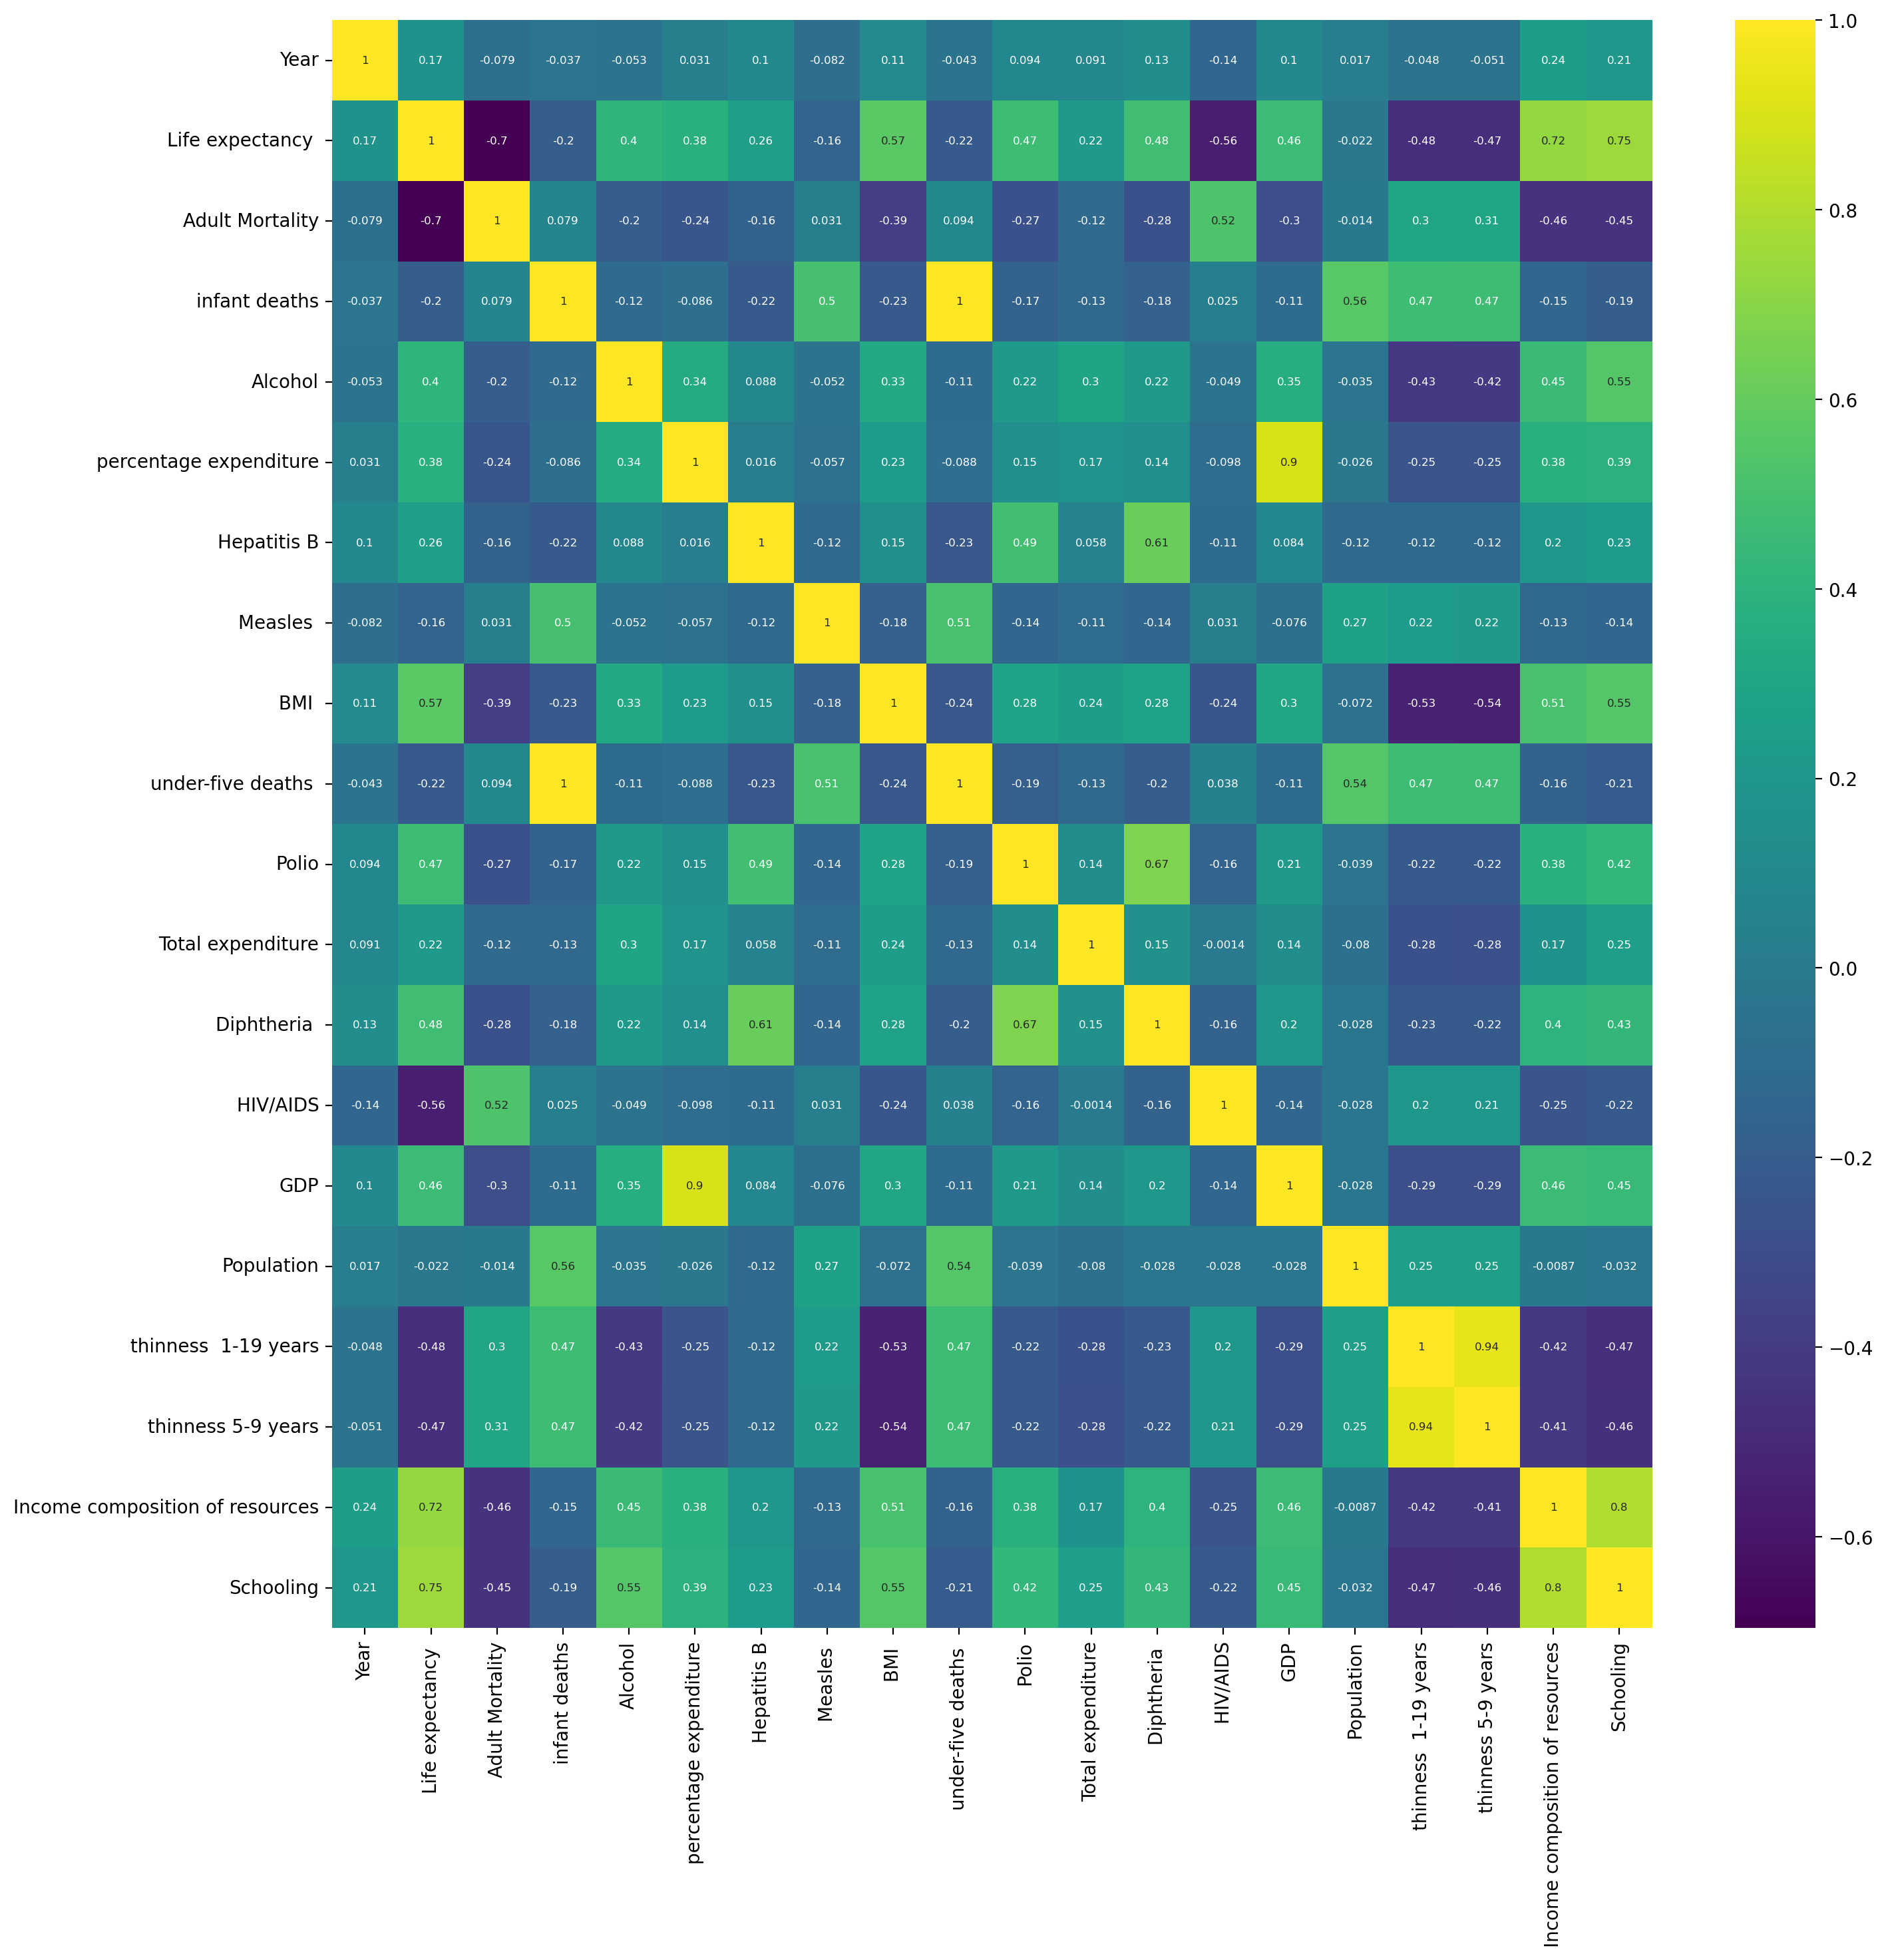

In [7]:
# Correlation between variables
plt.figure(figsize = (16,16), dpi = 200)
sns.heatmap(df.corr(), cbar=True, 
                 annot=True, 
                 annot_kws={'size': 6}, 
                 cmap="viridis");

In [9]:
# Checking for duplicated rows
df.duplicated().sum()

0

In [17]:
# Checking for null values
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

<br><br>

> **First Evaluation**
> * There are 22 rows including **Life Expectancy**, however, some columns such as **Adult Mortality**, **infant deaths** and **under-five deaths** are the breakdown of the Life expectancy.
> * Life expectancy is highly correlated with **BMI**, **alcohol** and **economical factors**. However, it has positive correlation with some diseases. This may be caused by only in certain countries these dieases appear considerably. It should be investigated in more detail.
> * **GDP** and **percentage expenditure** are highly correlated. One of them can be dropped.
> * There are null values that needs attention.
> * There are no duplicated rows.

<br><br>

In [118]:
# Dropping breakdown features of Life expectancy
df = df.drop(columns=['Adult Mortality', 'infant deaths', 'under-five deaths ', 'percentage expenditure'])

<br><br>

<a id='analysis-2'></a>

### 3.2. Data Distribution

Let's begin with visualization of numeric data distribution.

#### 3.2.1. Numerical Features

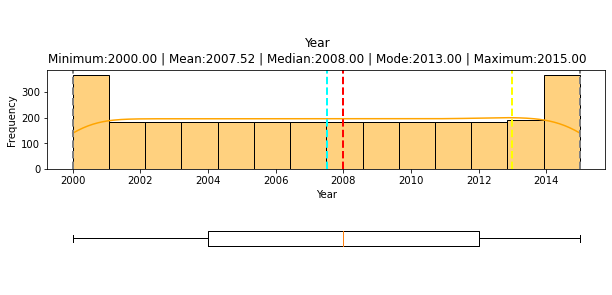

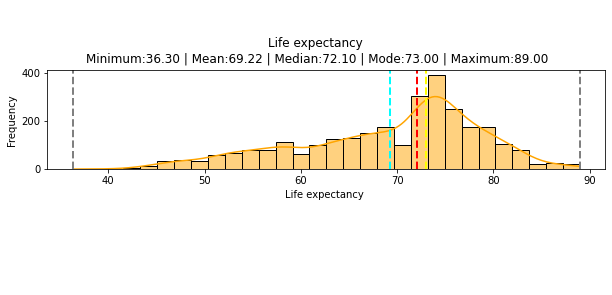

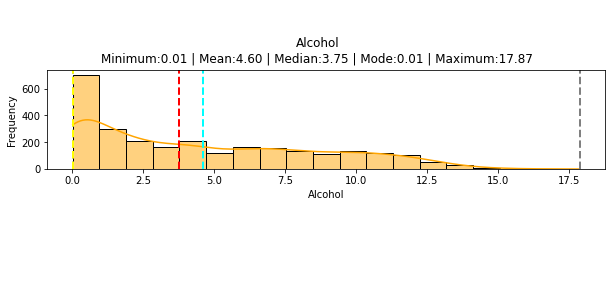

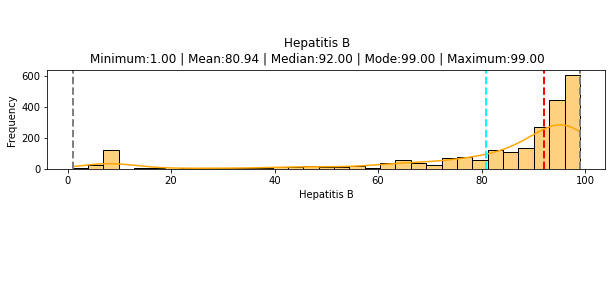

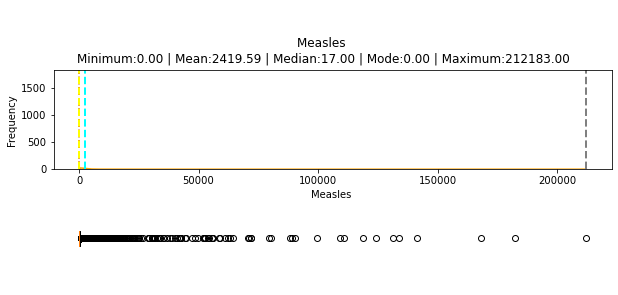

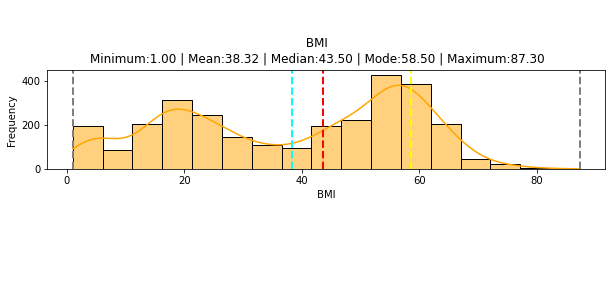

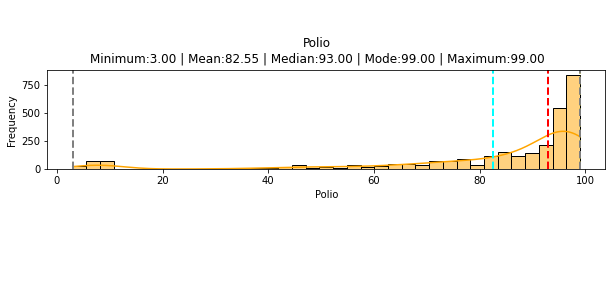

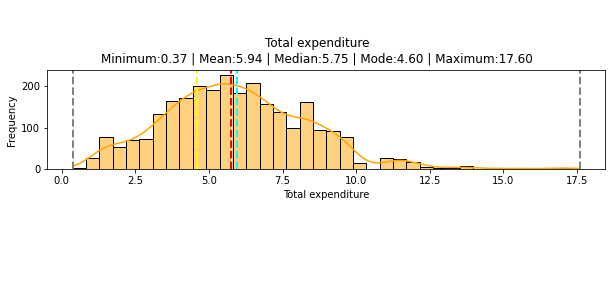

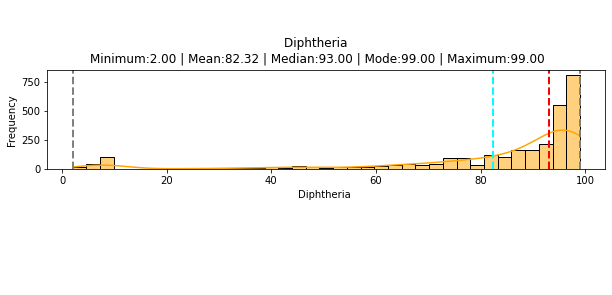

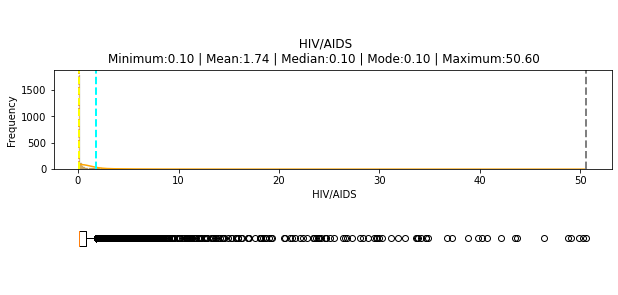

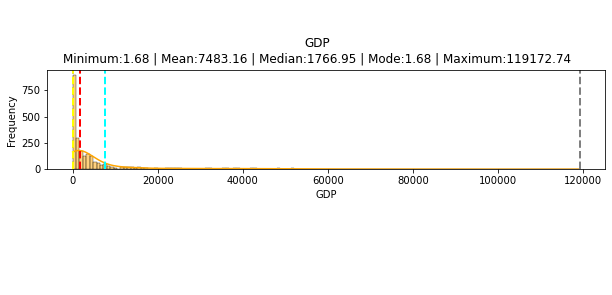

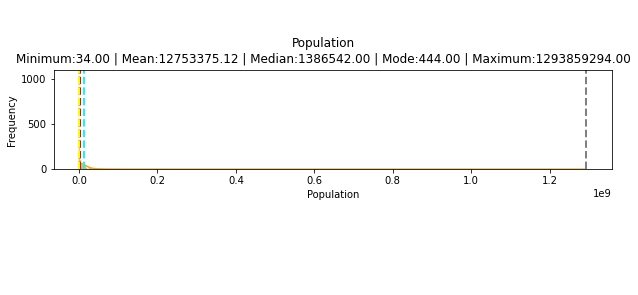

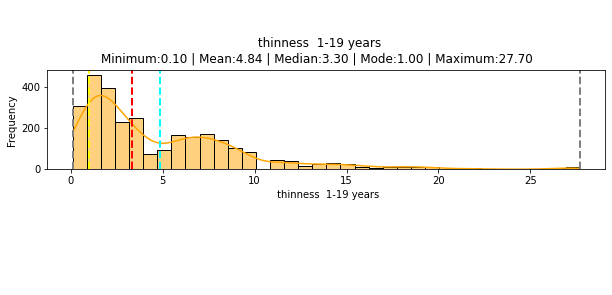

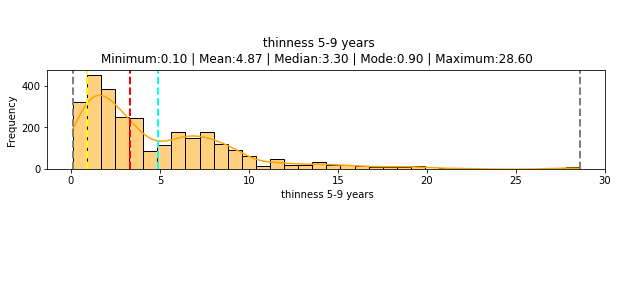

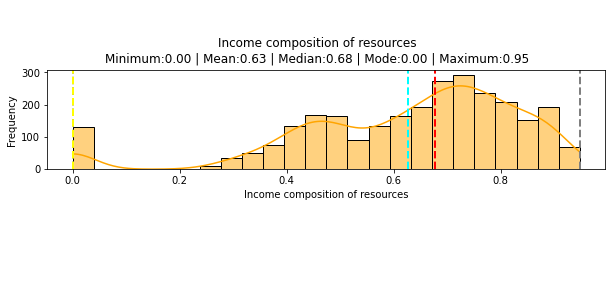

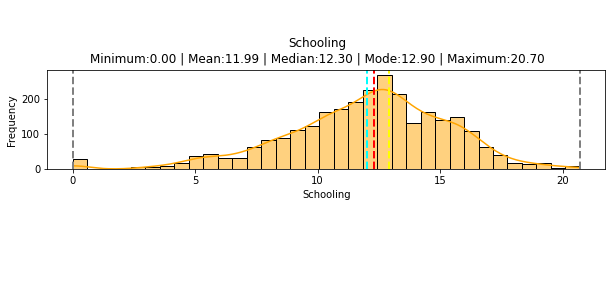

In [24]:
for col in df.select_dtypes(['int64', 'float64']).columns:
    var_data = df[col]

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    sns.histplot(var_data, ax = ax[0], kde = True, color = 'orange')
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')
    ax[1].axis('off')

    # Add a title to the Figure
    fig.suptitle('\n\n{}\nMinimum:{:.2f} | Mean:{:.2f} | Median:{:.2f} | Mode:{:.2f} | Maximum:{:.2f}\n'.format(col,
                                                                                            min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val), y = 1.1)
    # Show the figure
    fig.show()


> **Evaluation of Numeric Features**
> * There are outliers **Measles**, **HIV/AIDS**, **GDP** and **Population**. The outliers can be removed with **1.5 IQR** technique.

<br><br>

In [119]:
# Applying 1.5 IQR technique to numerical features

for col in ['Measles ', ' HIV/AIDS', 'GDP', 'Population']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR

    df = df[(df[col] < upper_range) & (df[col] > lower_range)]

Measles  0.0 360.25 360.25 -540.375 900.625
 HIV/AIDS 0.1 0.4 0.30000000000000004 -0.3500000000000001 0.8500000000000001
GDP 1122.9194 11485.0953775 10362.1759775 -14420.344566249998 27028.35934375
Population 115676.0 4654122.0 4538446.0 -6691993.0 11461791.0


<br><br>

#### 3.2.2. Categorical Features

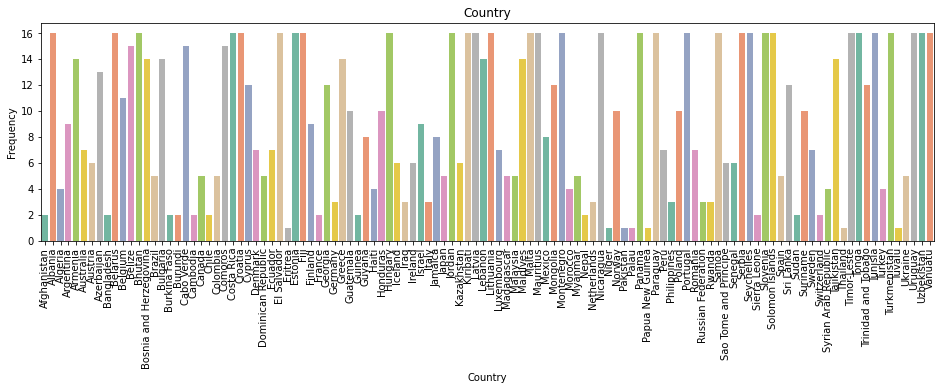

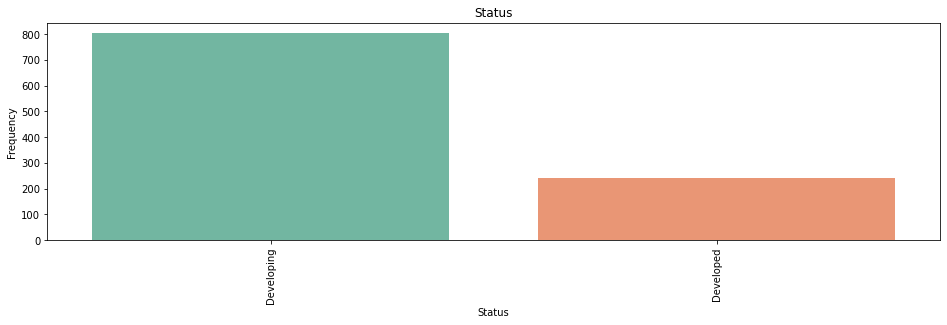

In [50]:
for col in df.select_dtypes('object').columns:
    var_data = df[col]
    
    # Plot the histogram  
    plt.figure(figsize = (16,4))
     
    sns.countplot(data = df, x = var_data, palette= 'Set2')
    plt.ylabel('Frequency')
    plt.title(f'{col}')
    plt.xticks(rotation = 90)
    
    # Show the figure
    fig.show()


<br><br>

> **Evaluation of Categorical Features**
> * There are two development levels that can be highly correlated with GDP level. If so, they can be dropped.

<br><br>

In [51]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Alcohol',
       'Hepatitis B', 'Measles ', ' BMI ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

<AxesSubplot:xlabel='GDP', ylabel='Life expectancy '>

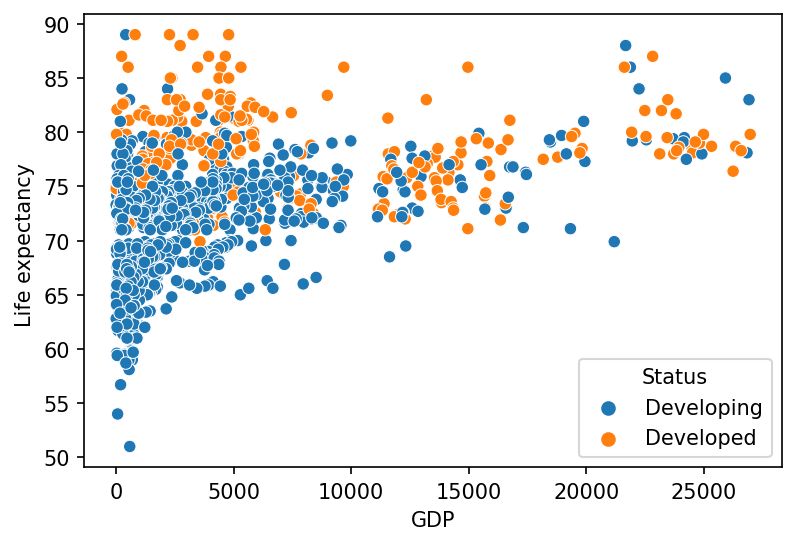

In [54]:
plt.figure(dpi = 150)
sns.scatterplot(data = df, x = 'GDP', y = 'Life expectancy ', hue = 'Status')

The graph shows that high GDP does not mean that one country being developed.

<br><br>

#### 3.2.3. Life Expectancy Relationships

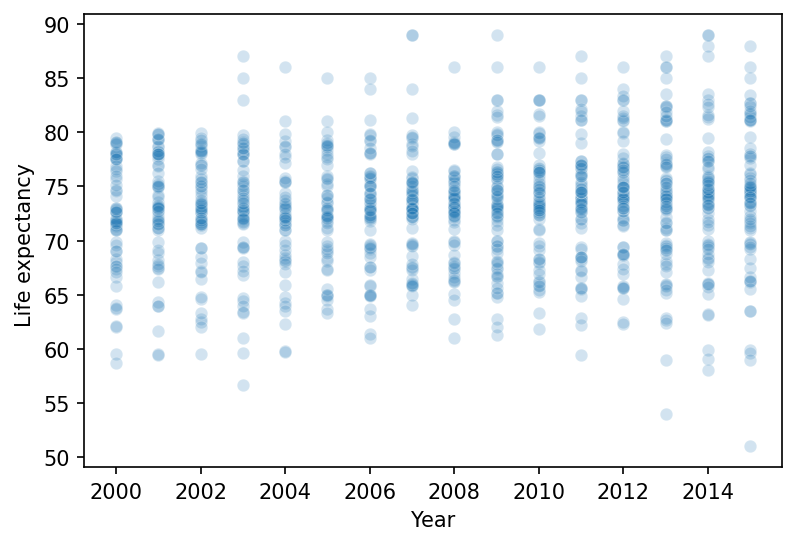

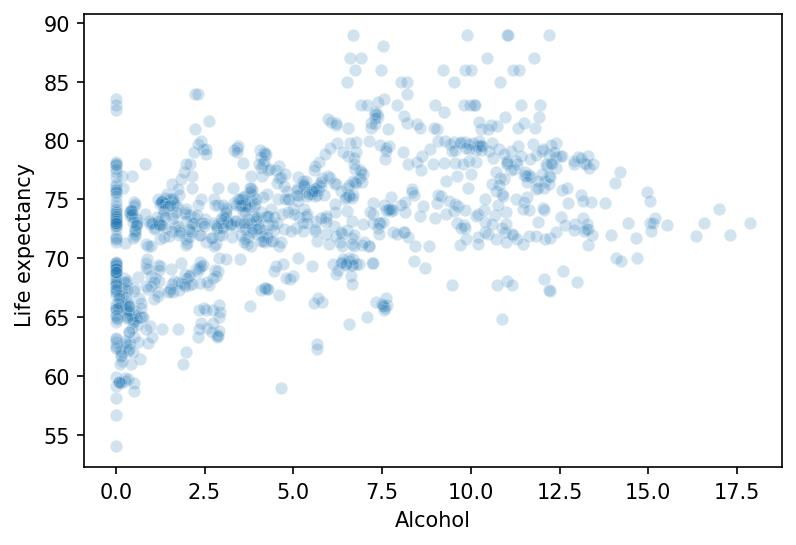

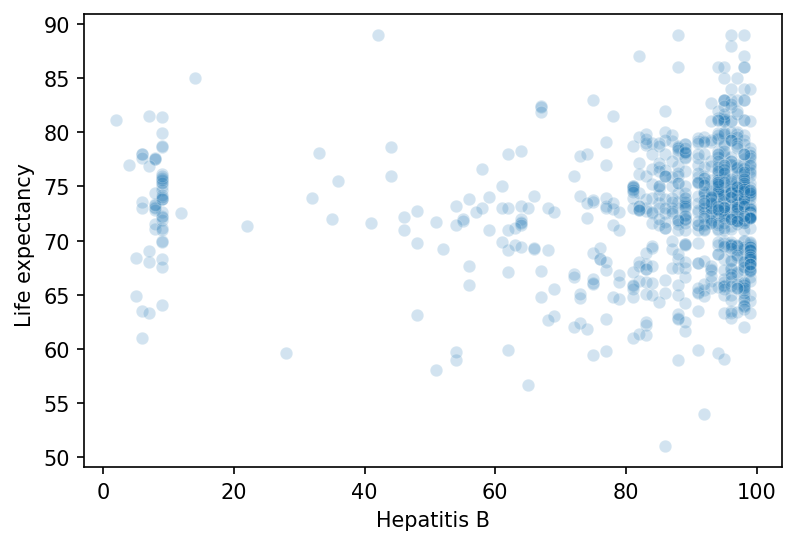

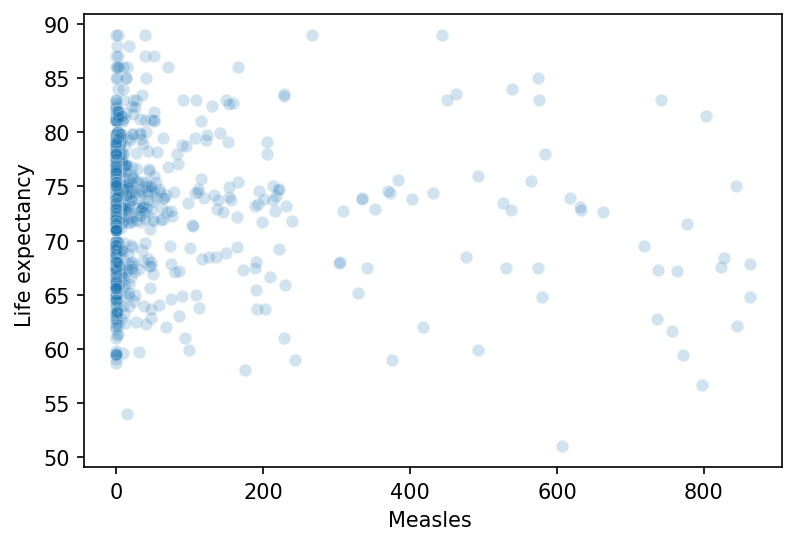

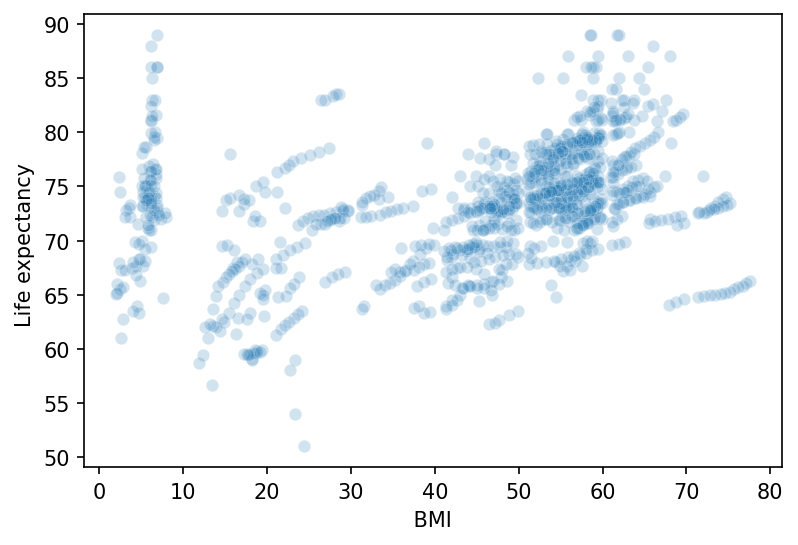

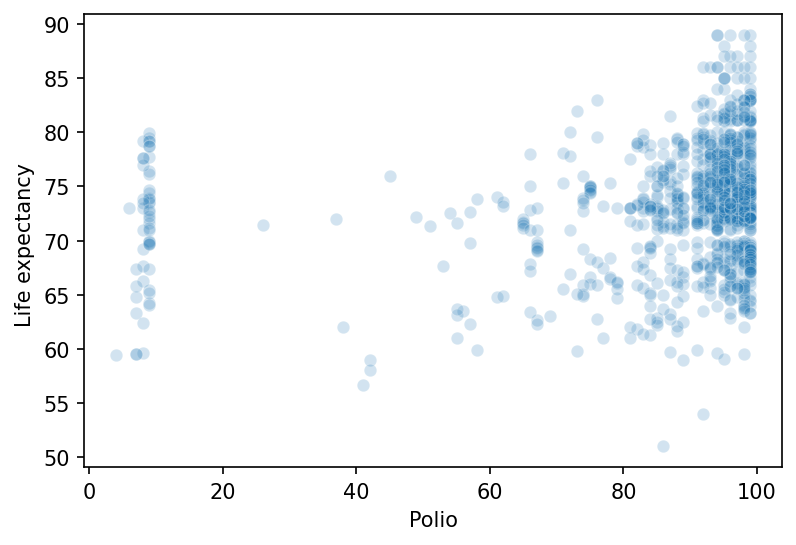

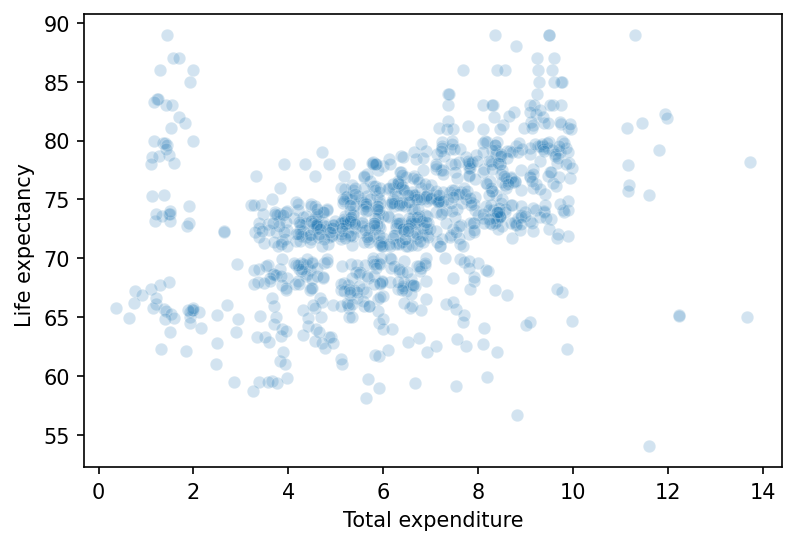

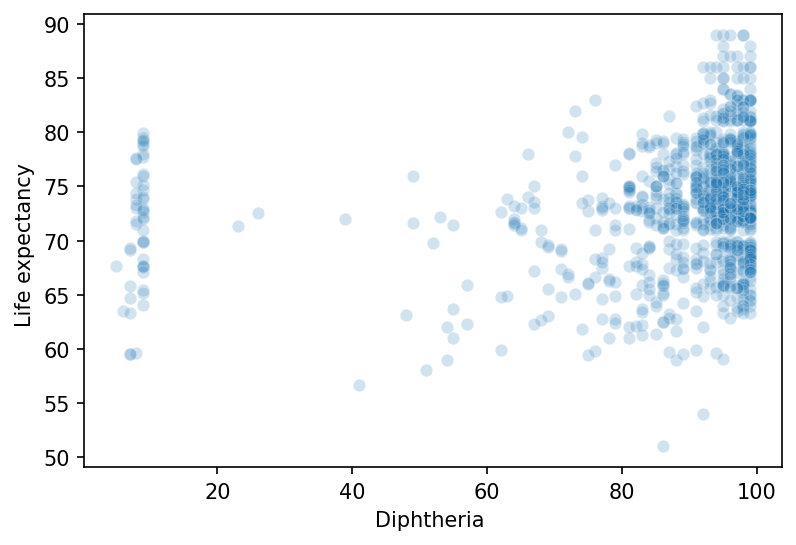

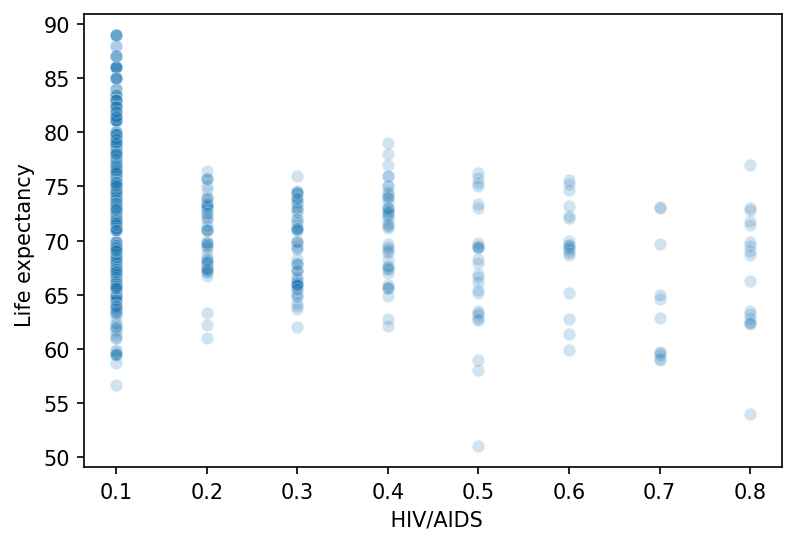

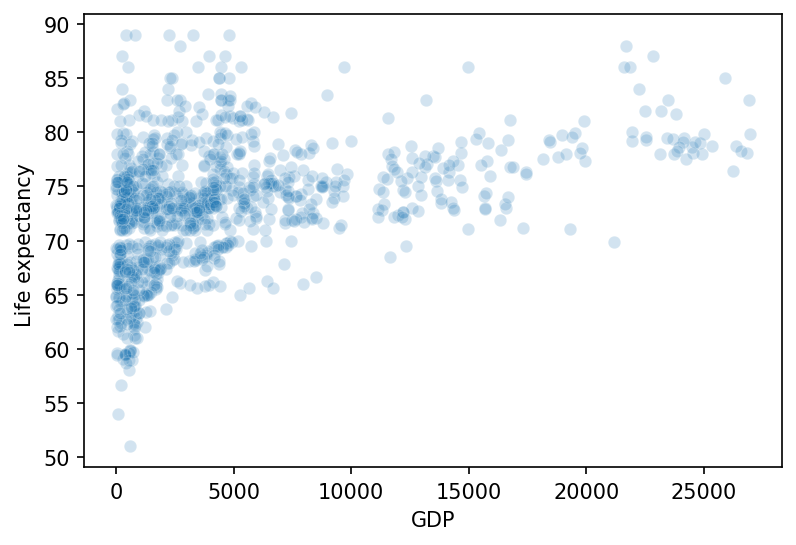

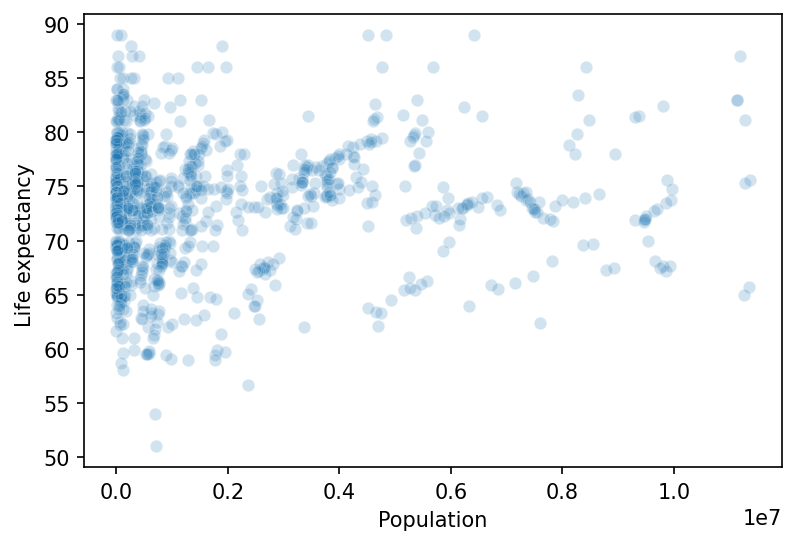

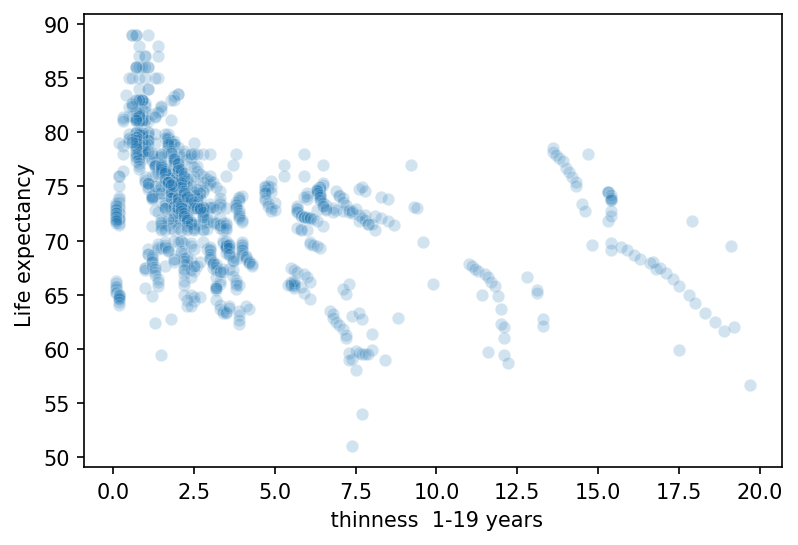

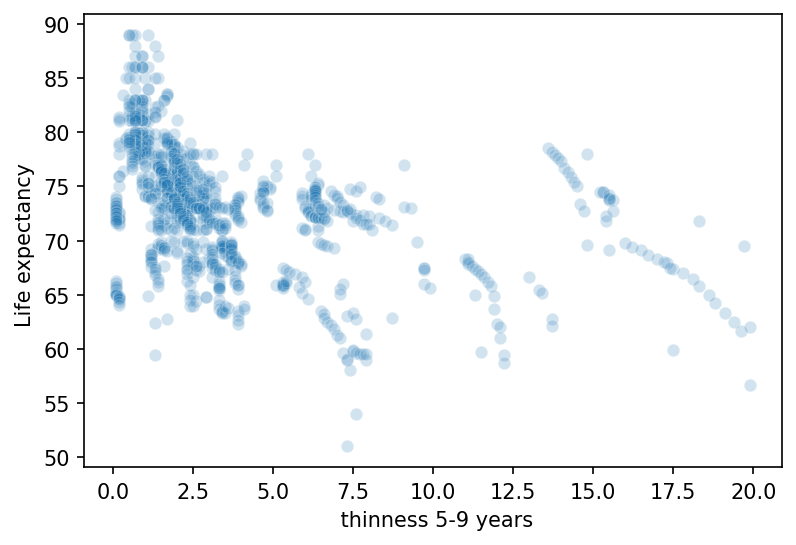

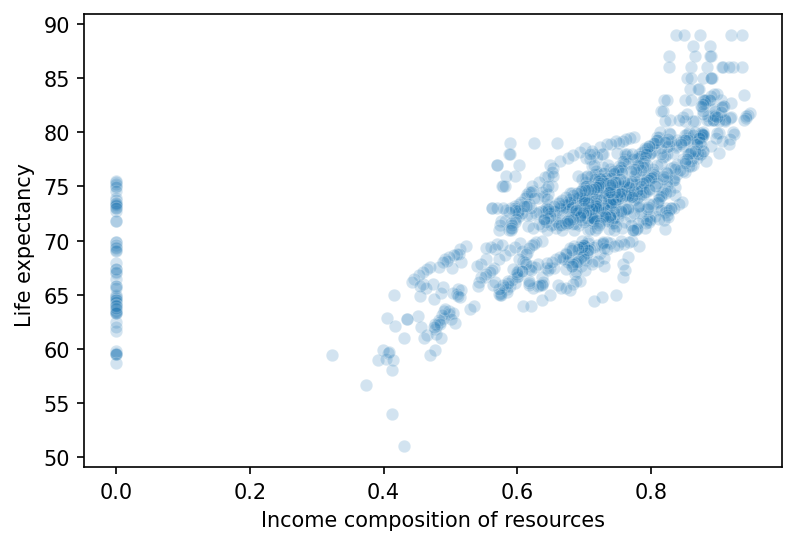

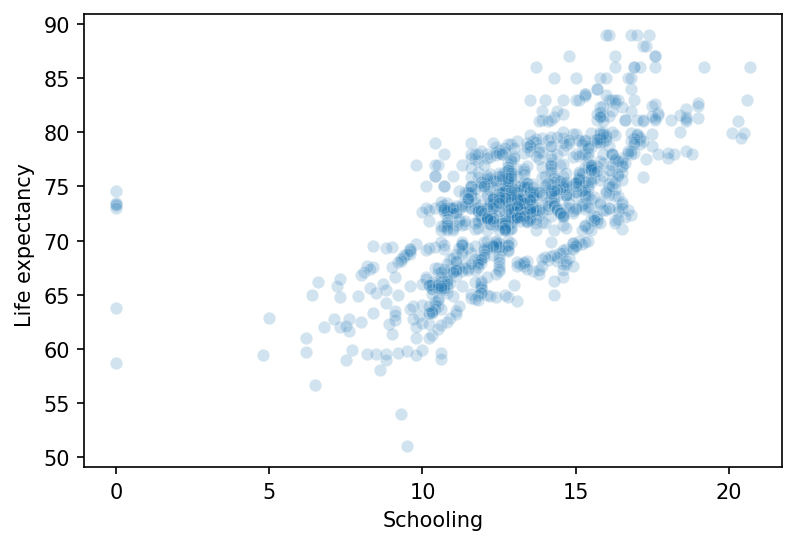

In [56]:
for col in df.select_dtypes(['int64', 'float64']).drop(columns=['Life expectancy ']).columns:
    plt.figure(dpi = 150)
    sns.scatterplot(data = df, x = col, y = 'Life expectancy ', alpha=0.2)
    plt.show()

<br><br>

> **Evaluation of the Figures**
> * It seems tree based algorithms may perform better than linear models. 

<br>[Return to the Outline](#outline) <br>

<br><br>

<a id='preprocessing'></a>

## 4. Data Preprocessing

<a id='preprocessing-1'></a>

### 4.1. Handling Missing Values

Let's begin with checking missing values.

In [90]:
df.shape

(1045, 18)

In [71]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      2
Alcohol                             74
Hepatitis B                        151
Measles                              0
 BMI                                 2
Polio                                8
Total expenditure                   73
Diphtheria                           8
 HIV/AIDS                            0
GDP                                  0
Population                           0
 thinness  1-19 years                2
 thinness 5-9 years                  2
Income composition of resources      1
Schooling                            0
dtype: int64

In [120]:
# Dropping rows missing Life Expectancy
df = df.drop(df[df['Life expectancy '].isnull()].index, axis = 0)

* There are 1045 rows in out dataset and some missing values especially in Hepatitis B, Alcohol and Total Expenditure. Dropping the rows containing any missing value may cause considerable amount of data. Therefore, let's analyse missing values deeper.

In [81]:
import missingno as msno

<AxesSubplot:>

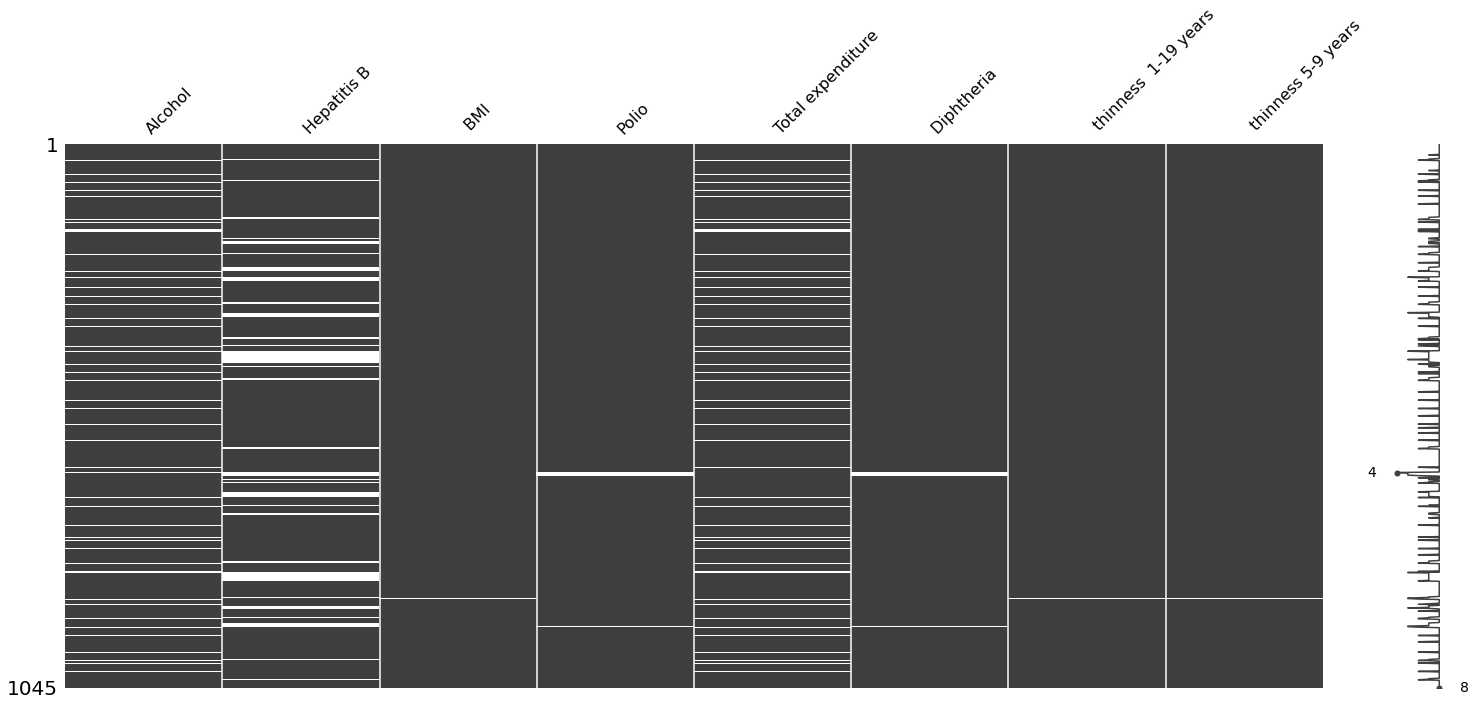

In [87]:
msno.matrix(df[df.columns[df.isnull().sum() > 0]])

<AxesSubplot:>

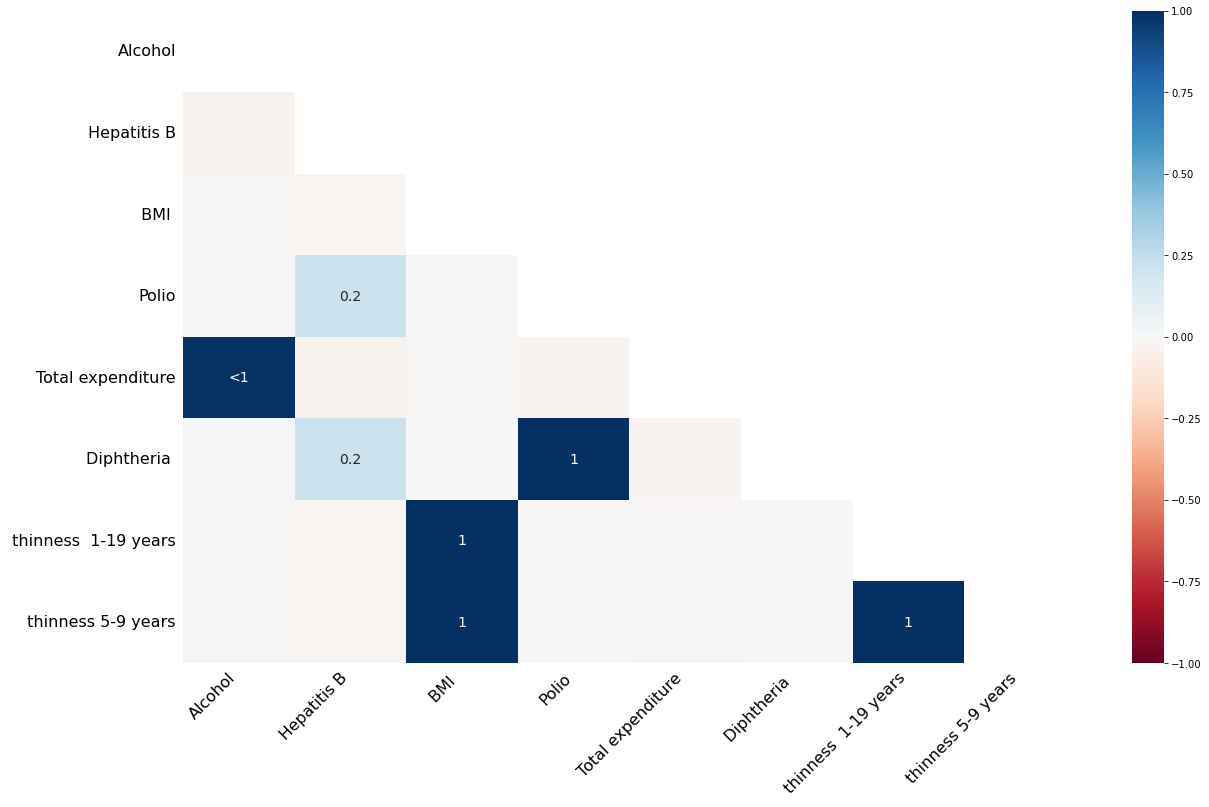

In [88]:
msno.heatmap(df)

* There are small to none correlation of nullities in missing features. That means a row missing a feature is likely to be not missing the other features. Thus, dropping the rows having any missing value may cause loss of up to 300 rows. Let's continue diving.

In [62]:
# Checking if some certain countries such as muslim countries have missing alcohol value
df[df['Alcohol'].isnull()]['Country'].unique()

array(['Armenia', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium',
       'Belize', 'Bhutan', 'Brazil', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Comoros', 'Costa Rica', 'Croatia',
       'Cyprus', 'Denmark', 'Dominican Republic', 'El Salvador',
       'Estonia', 'Fiji', 'Finland', 'Georgia', 'Greece', 'Guinea',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'Ireland',
       'Italy', 'Jamaica', 'Jordan', 'Kiribati', 'Latvia', 'Lebanon',
       'Lithuania', 'Luxembourg', 'Madagascar', 'Maldives', 'Malta',
       'Mauritius', 'Montenegro', 'Morocco', 'Myanmar', 'Nicaragua',
       'Palau', 'Panama', 'Paraguay', 'Portugal', 'Russian Federation',
       'Samoa', 'Sao Tome and Principe', 'Serbia', 'Seychelles',
       'Sierra Leone', 'Slovenia', 'Solomon Islands', 'Suriname',
       'Sweden', 'Switzerland', 'Tajikistan', 'Thailand', 'Timor-Leste',
       'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkmenistan',
       'Ukraine', 'Uruguay', 'Uzbekistan', 'V

In [66]:
# Checking if the countries which have poor recording missing disease values.
df[df['Hepatitis B'].isnull()]['Country'].unique()

array(['Algeria', 'Argentina', 'Australia', 'Azerbaijan',
       'Bosnia and Herzegovina', 'Cabo Verde', 'Canada', 'Chile',
       'Comoros', 'Croatia', 'Denmark', 'Estonia', 'Finland', 'Guatemala',
       'Haiti', 'Hungary', 'Iceland', 'Ireland', 'Japan', 'Malta',
       'Montenegro', 'Myanmar', 'Netherlands', 'Norway', 'Panama',
       'Paraguay', 'Peru', 'Serbia', 'Slovenia', 'Sri Lanka', 'Suriname',
       'Sweden', 'Switzerland', 'Tajikistan', 'Timor-Leste',
       'Turkmenistan', 'Uzbekistan'], dtype=object)

<br><br>Unfortunately, we could not find a hint. Let's also check the correlation of these features and the life expectancy to analyse what would be the cost of dropping these features to save rows.

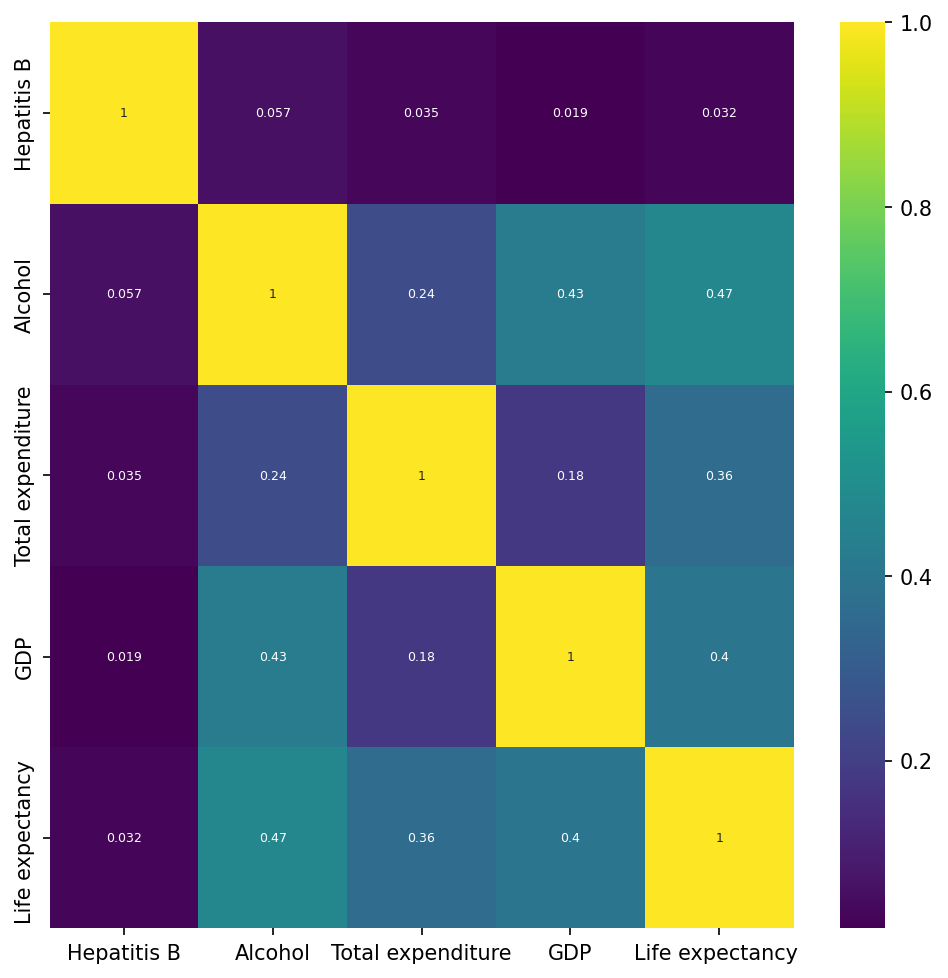

In [97]:
# Correlation between variables
plt.figure(figsize = (8,8), dpi = 150)
sns.heatmap(df[['Hepatitis B', 'Alcohol', 'Total expenditure', 'GDP', 'Life expectancy ']].corr(), cbar=True, 
                 annot=True, 
                 annot_kws={'size': 6}, 
                 cmap="viridis");

> * The correlation between **Hepatisus B** and **Life Expectancy** is very weak so we can sacrifice it. 
> * **Alcohol** and **Total Expenditure** cannot be unseen while predicting **Life Expectancy**. So it would be better to keep them.
> * Correlation between **GDP** and **Total Expenditure** is also checked because if there were a high correlation, we could drop one of them. But that was not the case.

<br><br>

In [121]:
# Dropping Hepatitis B column
df = df.drop(columns= 'Hepatitis B')

In [99]:
df.isnull().sum()

Country                             0
Year                                0
Status                              0
Life expectancy                     0
Alcohol                            73
Measles                             0
 BMI                                2
Polio                               8
Total expenditure                  73
Diphtheria                          8
 HIV/AIDS                           0
GDP                                 0
Population                          0
 thinness  1-19 years               2
 thinness 5-9 years                 2
Income composition of resources     0
Schooling                           0
dtype: int64

In [122]:
# Dropping rows containing null values
df = df.dropna(axis=0)

In [110]:
df.shape

(962, 17)

We have managed to keep 962 of the 1045 values. This is a good ratio so we do not need imputation.

<br><br>

<a id='preprocessing-2'></a>

### 4.2. Encoding Categorical Features

We should first drop **Country** and **Year** columns as we investigate only the factors affecting life expectancies. Then, we can use pandas getdummy() method to encode categorical values.

In [123]:
df = pd.get_dummies(df.drop(columns = ['Country','Year']), drop_first = True)

<br><br>

<a id='preprocessing-3'></a>

### 4.3. Scaling Data

Some ML model requires scaling of numerical data.

In [125]:
# Scaling the numeric values in the dataset (only independent features)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = df.drop(columns='Life expectancy ').select_dtypes(['int64', 'float64']).columns

df[num_cols] = scaler.fit_transform(df[num_cols])

In [129]:
df.head()

,Life expectancy,Alcohol,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
1,59.9,-1.220985,3.355690,-1.371662,-1.398890,0.848140,-1.246166,-0.433239,-0.697049,-0.552271,3.857918,3.739362,-1.001539,-1.308250,1
12,56.7,-1.220985,5.657766,-1.647524,-2.211645,1.131892,-2.274559,-0.433239,-0.769819,0.283569,4.462847,4.381645,-1.517458,-2.748365,1
16,77.8,-0.141496,-0.345688,0.718524,0.561285,-0.118390,0.565764,-0.433239,-0.109652,-0.674824,-0.624050,-0.596048,0.431012,0.419887,1
17,77.5,-0.162662,-0.345688,0.676084,0.513476,-0.171593,0.516792,-0.433239,-0.000395,-0.568136,-0.624050,-0.596048,0.426003,0.419887,1
18,77.2,-0.103867,-0.345688,0.638949,0.561285,-0.269133,0.565764,-0.433239,-0.028704,-0.567857,-0.596553,-0.569286,0.415985,0.419887,1


<br><br>

<br>[Return to the Outline](#outline) <br>

<br><br>

<a id='mlmodels'></a>

## 5. ML Models

<a id='mlmodels-1'></a>

### 5.1. Regression Models

Let's define the variables and a function to create regression model with default values.

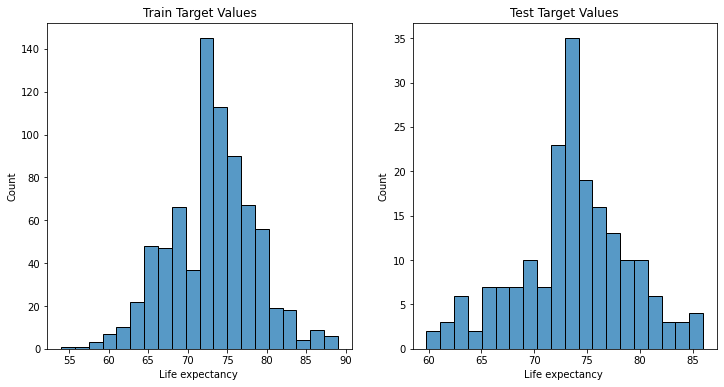

In [132]:
from sklearn.model_selection import train_test_split

X = df.drop(columns= 'Life expectancy ')
y = df['Life expectancy ']

# Split train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Plotting the disributions of the target value
fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.histplot(x = y_train, bins = 20, ax = ax[0])
ax[0].set_title('Train Target Values')

sns.histplot(x = y_test, bins = 20, ax = ax[1])
ax[1].set_title('Test Target Values')
plt.show()

In [133]:
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [134]:
regression_algorithms = [ElasticNet(), KNeighborsRegressor(), SVR(),
                        MLPRegressor(), DecisionTreeRegressor(), BaggingRegressor(),
                        RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(),
                        XGBRegressor(), LGBMRegressor(), CatBoostRegressor(verbose=0)]

In [135]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

result_table = pd.DataFrame(columns = ['model', 'RMSE', 'MAE', 'R2'])

#define a function to test the models without tuning
def create_model(model):
    print('-'*50, '\n', str(model)[:50])
    
    # Creating the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Recording the result
    result_table.loc[len(result_table)] = [str(model)[:50], 
                                           np.sqrt(mean_squared_error(y_test, y_pred)),  #RMSE
                                           mean_absolute_error(y_test, y_pred),  #MAE
                                           r2_score(y_test, y_pred)]  #R2 score

In [136]:
# Running the algorithms one by one
for model in regression_algorithms:
    create_model(model)

-------------------------------------------------- 
 ElasticNet()
-------------------------------------------------- 
 KNeighborsRegressor()
-------------------------------------------------- 
 SVR()
-------------------------------------------------- 
 MLPRegressor()
-------------------------------------------------- 
 DecisionTreeRegressor()
-------------------------------------------------- 
 BaggingRegressor()
-------------------------------------------------- 
 RandomForestRegressor()
-------------------------------------------------- 
 AdaBoostRegressor()
-------------------------------------------------- 
 GradientBoostingRegressor()
-------------------------------------------------- 
 XGBRegressor(base_score=None, booster=None, callba
-------------------------------------------------- 
 LGBMRegressor()
-------------------------------------------------- 
 <catboost.core.CatBoostRegressor object at 0x7fe14


<AxesSubplot:ylabel='model'>

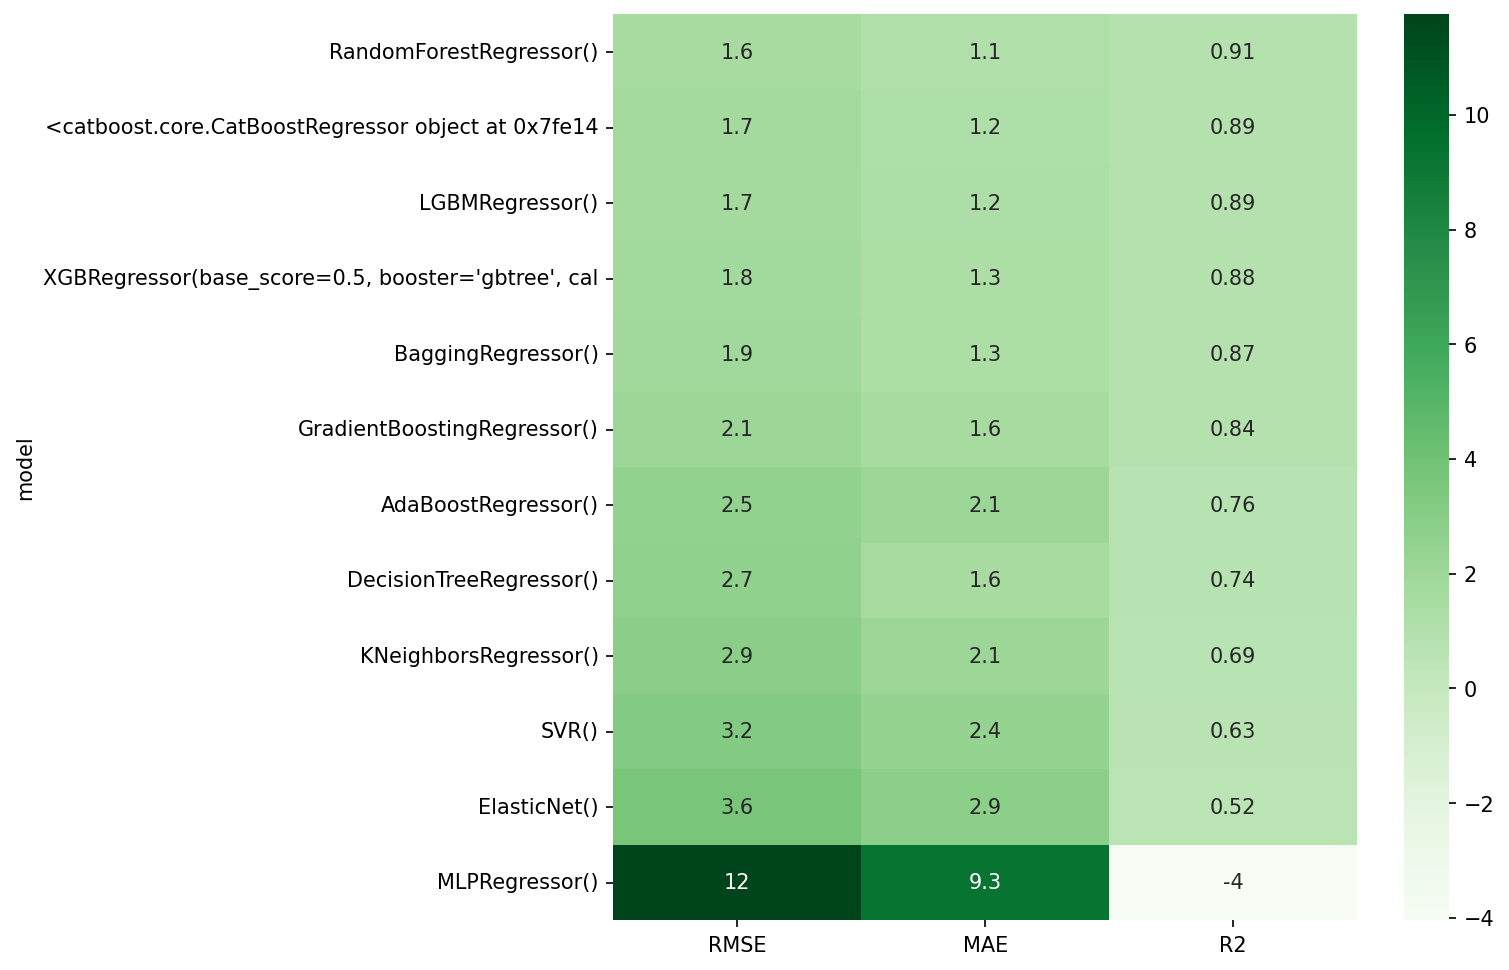

In [138]:
plt.figure(figsize = (8,8), dpi = 150)
sns.heatmap(result_table.set_index('model').sort_values(by = 'RMSE', ascending = True), annot = True, cmap = 'Greens')

In [139]:
# Mean of the target value
df['Life expectancy '].mean()

73.19823284823292

In [140]:
# Getting the predictions from the best performing model
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

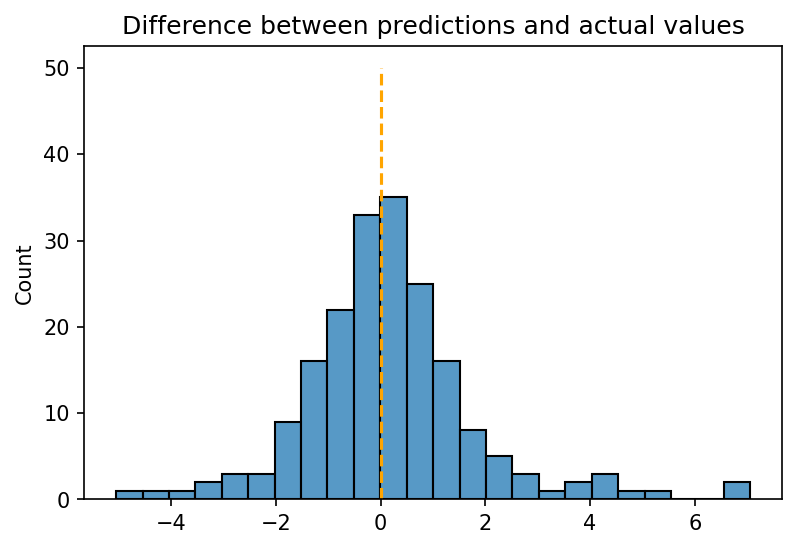

In [141]:
plt.figure(dpi = 150)
sns.histplot(y_test.values - y_pred)
plt.vlines(x = 0, ymin=0, ymax=50, linestyles='--', color = 'orange')
plt.title('Difference between predictions and actual values');

<br><br>

> **Evaluation of Results**
> * **RandomForest** gives the best result for our data set. It has **the best RMSE score of 1.6** and **91% R2 score**. These scores may be even better after hyperparameter tuning.
> * The difference between predictions and actual values shows nearly perfect normal distribution.

<br><br>

<a id='mlmodels-2'></a>

### 5.2. Model Tuning

In [142]:
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestRegressor()
param_grid = {"n_estimators":[500,1000],  
              "max_features":[10,50,70]
             }

In [143]:
cv_model = RandomizedSearchCV(model, param_grid, cv=5)
cv_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_features': [10, 50, 70],
                                        'n_estimators': [500, 1000]})

In [144]:
cv_model.best_params_

{'n_estimators': 1000, 'max_features': 10}

In [145]:
model = RandomForestRegressor(n_estimators = 1000,
                             max_features= 10)

create_model(model);

-------------------------------------------------- 
 RandomForestRegressor(max_features=10, n_estimator


<AxesSubplot:ylabel='model'>

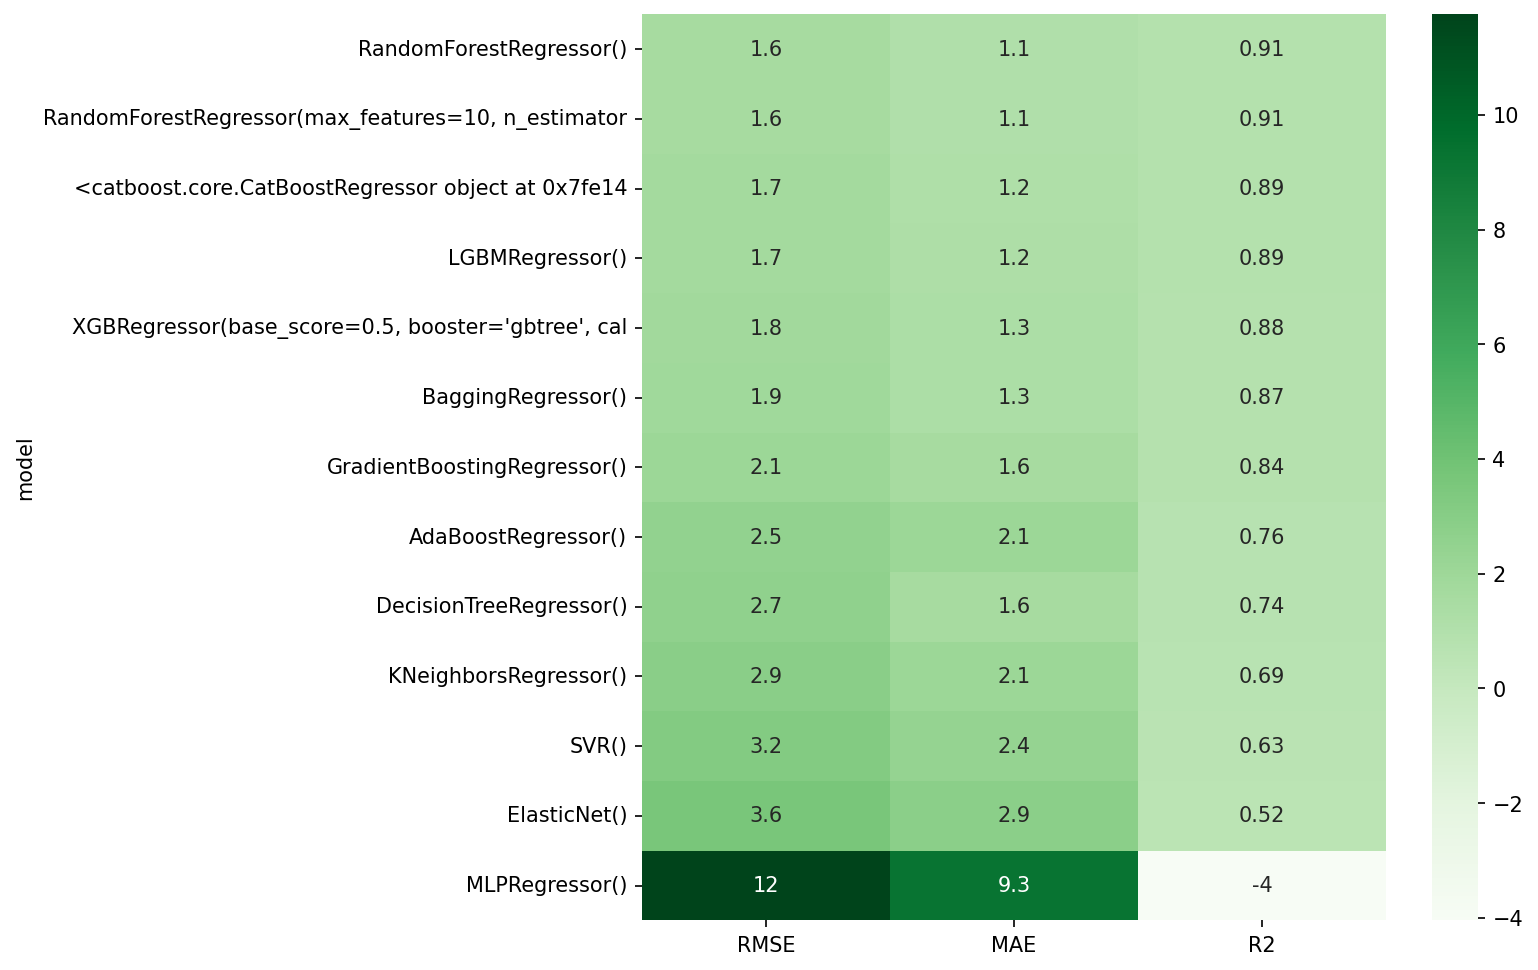

In [146]:
plt.figure(figsize = (8,8), dpi = 150)
sns.heatmap(result_table.set_index('model').sort_values(by = 'RMSE', ascending = True), annot = True, cmap = 'Greens')

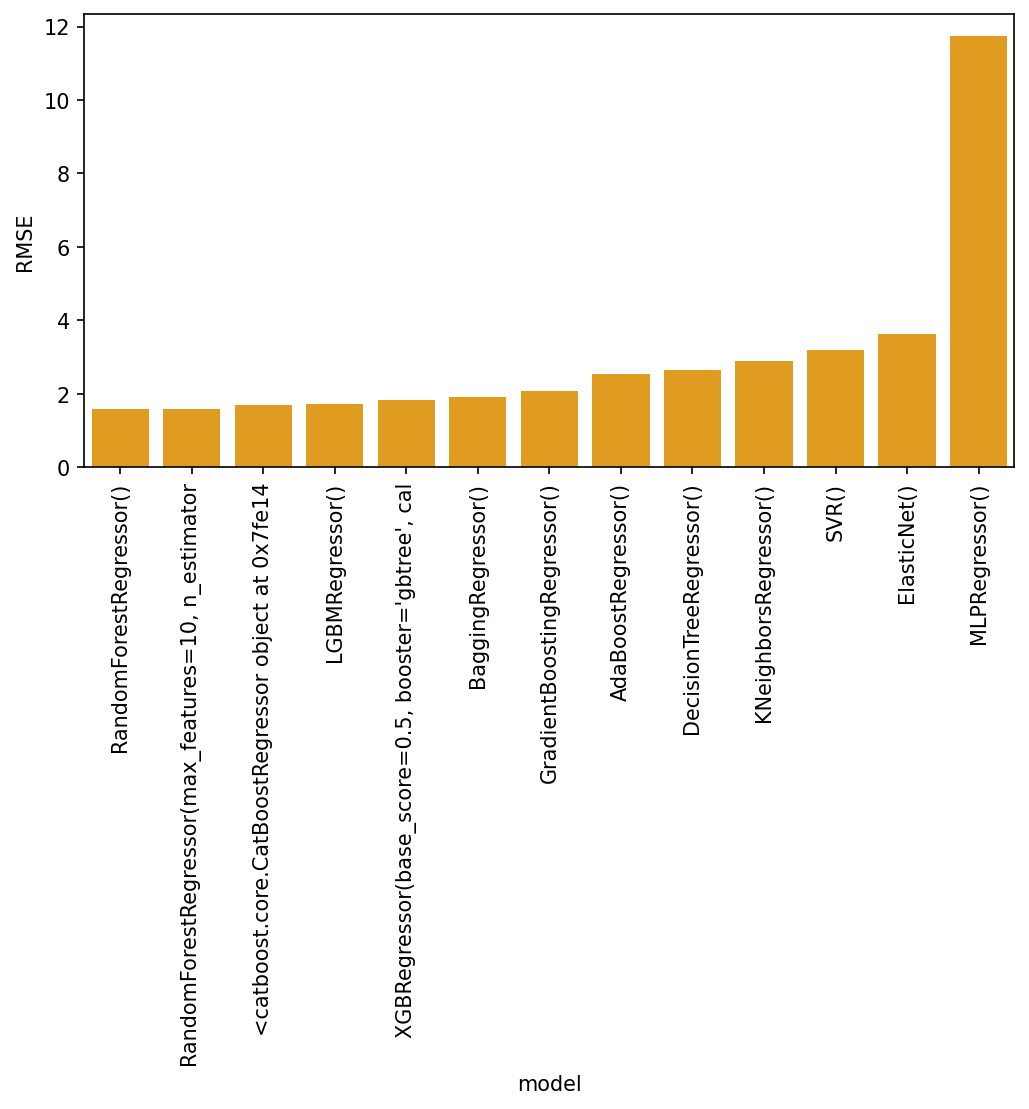

In [147]:
plt.figure(dpi = 150, figsize=(8,4))
sns.barplot(data = result_table.sort_values(by = 'RMSE'), x = 'model', y = 'RMSE', color = 'orange')
plt.xticks(rotation = 90);

> **Evaluation of Results**
> * Tuned model gives almost the same scores, but we know now that crossvalidation will give some avoiding of overfitting advantage.

<br><br>

<a id='mlmodels-3'></a>

### 5.3. Feature Importance

In [148]:
# Creating a dataframe for feature importances
imp_feats = pd.DataFrame(data = model.feature_importances_,
                         index = X.columns,columns = ['Feature Importance']).sort_values("Feature Importance")

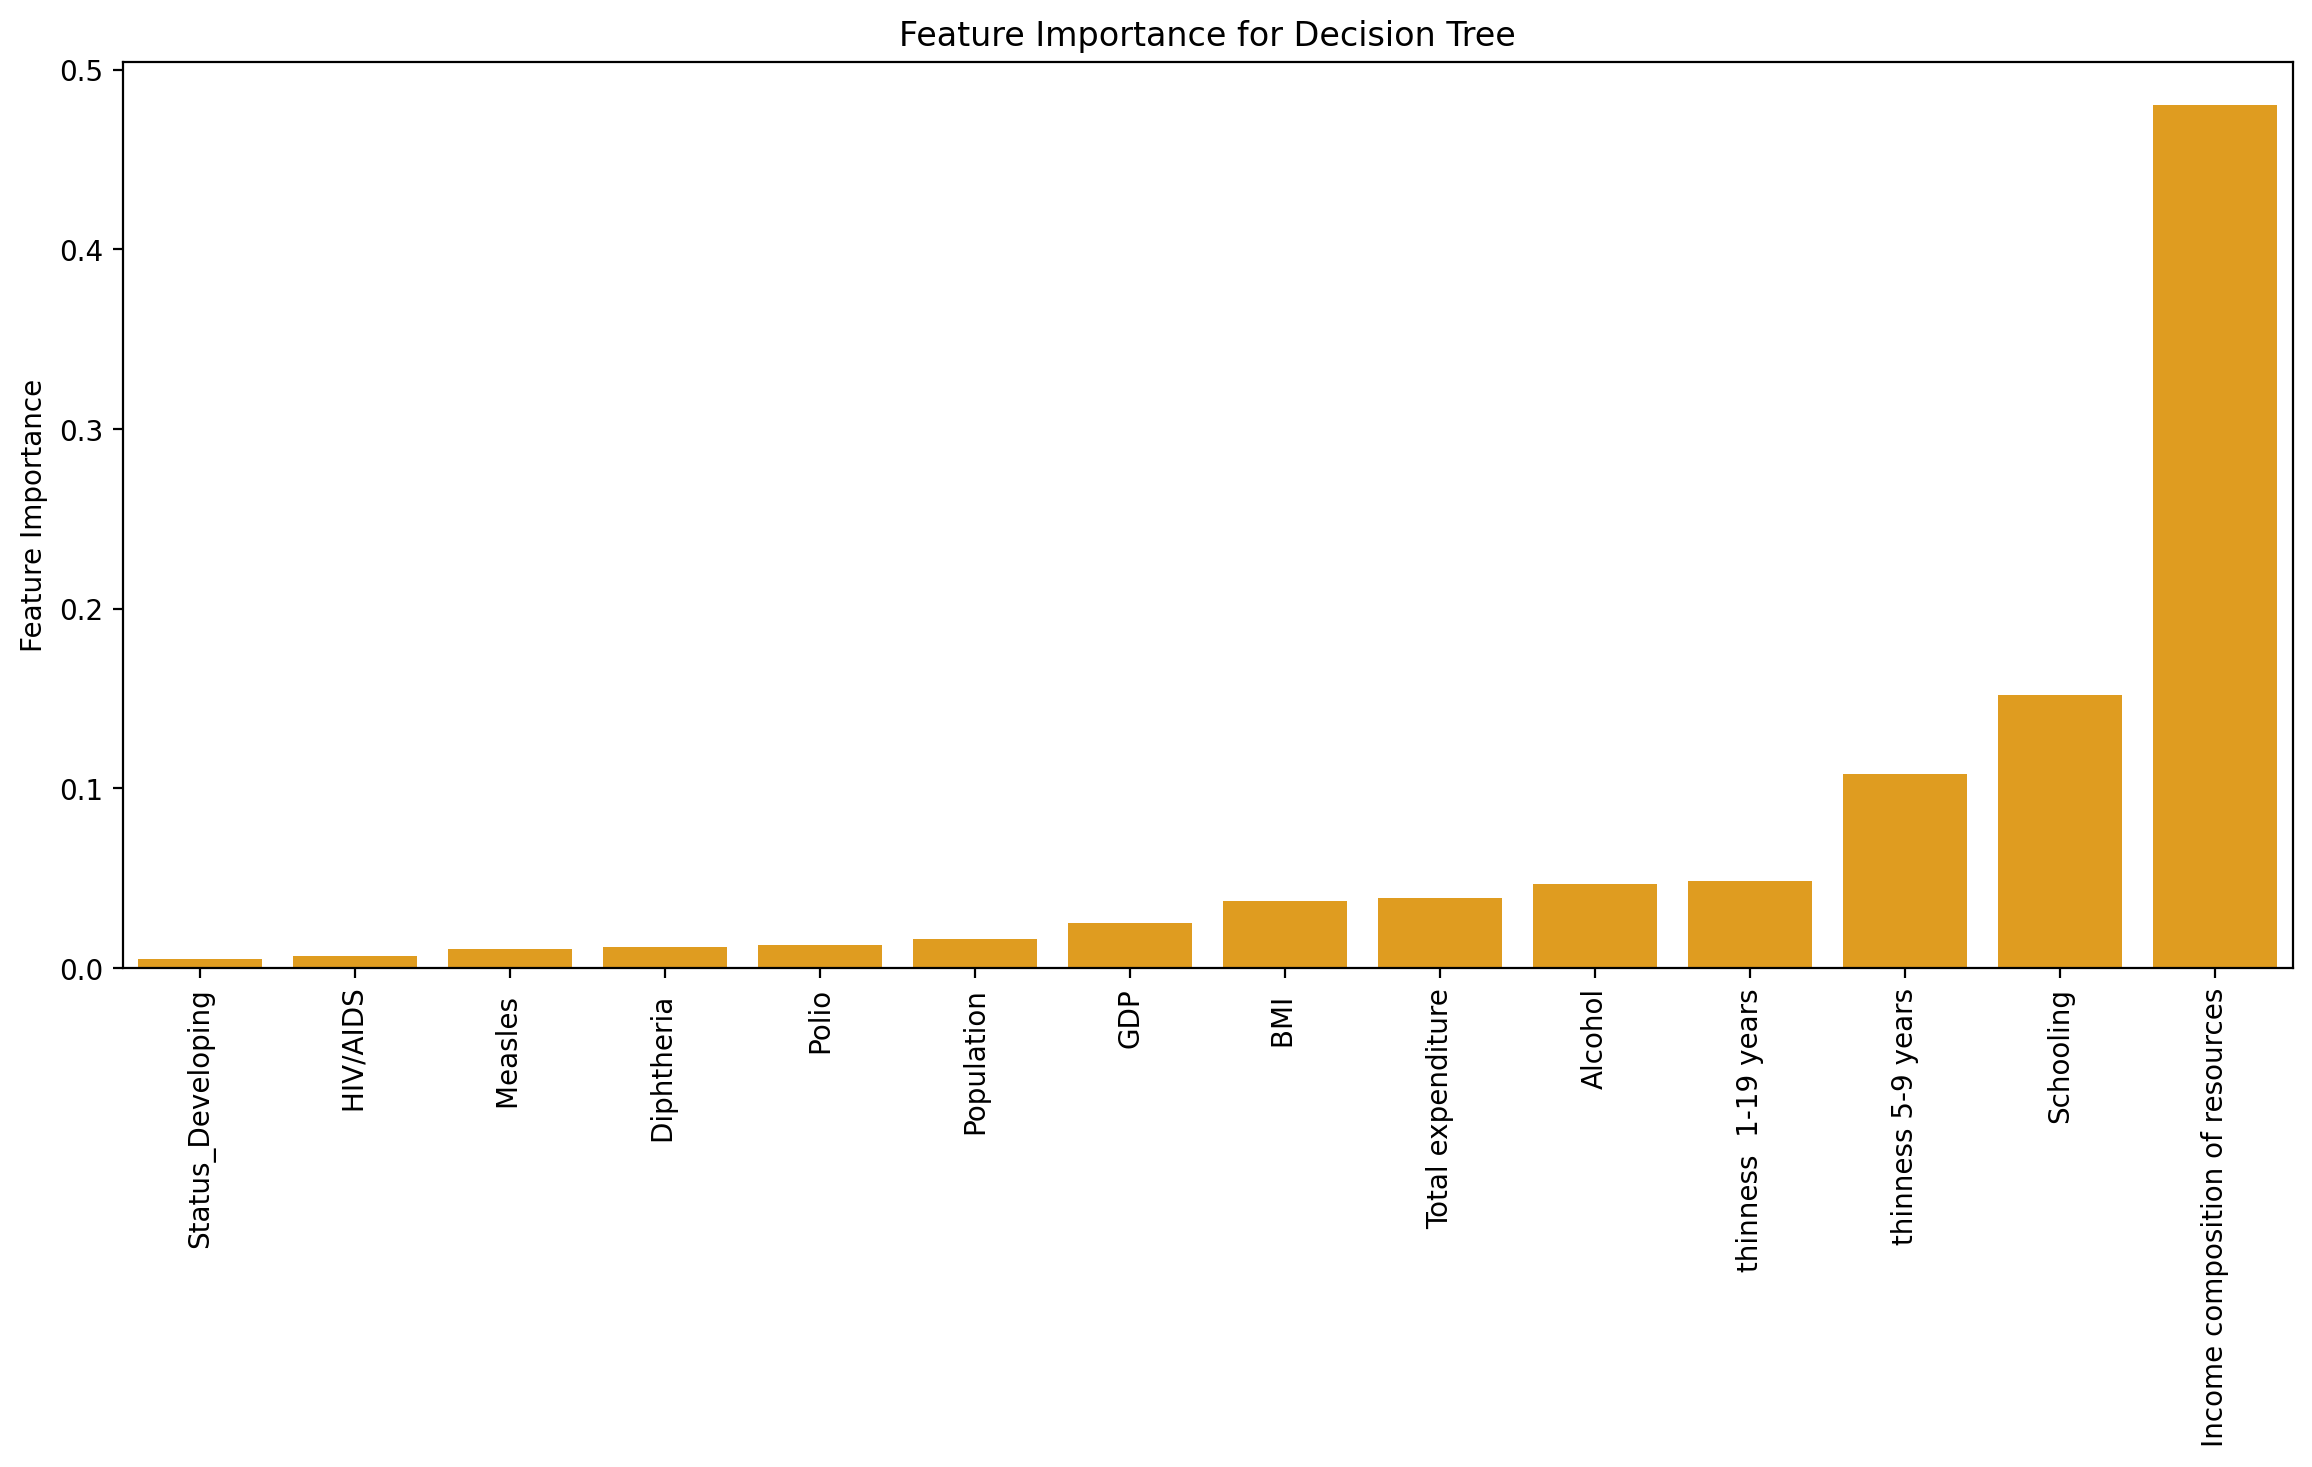

In [149]:
plt.figure(figsize = (14,6), dpi = 200)
sns.barplot(data = imp_feats,
            x = imp_feats.index,
            y = 'Feature Importance', color = 'orange')
plt.xticks(rotation = 90)
plt.title("Feature Importance for Decision Tree");

> **Evaluation of Results**
> * **Income composition of resources** is the most effective factor on life expecntancies. After that **the healthy living related features** affect the life expectancy. Last but not least, **development of country** related features such as **Schooling**, **Total expenditure** and **GDP** has also significant effects on life expectancy.

<br><br>

<br>[Return to the Outline](#outline) <br>

<a id='pipeline'></a>

## 6. Making Pipeline

In this section, we create pipeline to automate preprocessing and modelling work so that when we enter a new value our pipeline do all the steps for us and gives us the prediction. We will use `Pipeline` and `ColumnTransformer`.

In [159]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

<br><br>

> * Our pipeline should complete the following steps that we have done in this study.
> ** Drop the columns that are highly correlated with life expectancy or null values.
> ** Remove outliers.
> ** One-hot encode the categorical feature.
> ** Scale the numerical features.
> ** Build a regression model.

In [173]:
# Dropping unnecessary columns, removing outliers, removing null values
def clean_data(df):
    df = df.drop(columns=['Country', 'Year', 'Adult Mortality', 'infant deaths', 'under-five deaths ', 
                            'percentage expenditure','Hepatitis B'])
    for col in ['Measles ', ' HIV/AIDS', 'GDP', 'Population']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_range = Q1 - 1.5 * IQR
        upper_range = Q3 + 1.5 * IQR

    df = df[(df[col] < upper_range) & (df[col] > lower_range)]
    df = df.dropna(axis=0)
    return df

In [160]:
# Select numeric and categorical features and decide what to do with them
numeric_features = df.drop(columns='Life expectancy ').select_dtypes(['int64', 'float64']).columns
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

categorical_features = df.select_dtypes(['object']).columns
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

# Define a ColumnTransformer to deal with mixed type of data
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [186]:
# Create a pipeline with the preprocessor and our tuned regressor model 
model = RandomForestRegressor(n_estimators = 1000,
                             max_features= 10)

clf = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("regressor", model)]
)

# Define X and y variables and fit the model
df2 = data.copy()
df2 = clean_data(df2)
X = df2.drop(columns='Life expectancy ')
y = df2['Life expectancy ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("model RMSE: %.3f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("model R2: %.3f" % r2_score(y_test, y_pred))

model RMSE: 2.389
model R2: 0.939


<br><br>It seems the pipeline model performed somehow even better with **93.9% R2 score**. Let's try our pipeline. We can just enter the necessary variables. Let's get the first row and compare the actual and predicted life expectancy.

In [ ]:
np.array(df2.iloc[0])

array(['Developing', 59.9, 0.01, 492, 18.6, 58.0, 8.18, 62.0, 0.1,
       612.696514, 327582.0, 17.5, 17.5, 0.476, 10.0], dtype=object)

<br><br>

Enter `'Status', 'Alcohol', 'Measles ', ' BMI ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'`

In [184]:
new_input = [['Developing', 0.01, 492, 18.6, 58.0, 8.18, 62.0, 0.1,
       612.696514, 327582.0, 17.5, 17.5, 0.476, 10.0]]

print(f'The predicted life expectancy: {clf.predict(pd.DataFrame(data = new_input, columns= X.columns))[0]:.2f}')

The predicted life expectancy: 60.41


<br><br>Our pipeline model predict 60.41 life expectancy where the actual was 59.9. Our model works perfectly.

<br><br>

<br>[Return to the Outline](#outline) <br>

<a id='conclusion'></a>

## 7. Conclusion

Over the years, the importance of data science in insurance area has increased significantly. One case study where these techniques are useful is to analyse and predict the life expectancies. 

In this work, life expectancies are analysed with statistical analysis and data visualization. For prediction many regression algorithms from sci-kit learn library is tested. **RandomForestRegressor** has the best RMSE and R2 scores. Hyperparameters of this algorithm are tuned with Random search crossvalidation method. Then, all processes are automated with a **pipeline** and **93.9 R2 Score** with **2.3 RMSE** is achieved.

The most important feature of RandomForestRegressor for predicting life expectancy was **Income composition of resources**. Then, **the healthy living related features** and **development** related features such as **Schooling**, **Total expenditure** and **GDP** has also significant effects on life expectancy.

> **Check my other works in my Github Page** https://github.com/DrFarukAydin/data-science-portfolio

Don't forget to check interactive mortality vs fertility graph that I created in **Tableau**. <a href="https://public.tableau.com/app/profile/omer.faruk.aydin/viz/Mortalityvs_FertilityintheWorld/mortality_fertility">Click here for the interactive dashboard.</a>

<a href="https://public.tableau.com/app/profile/omer.faruk.aydin/viz/Mortalityvs_FertilityintheWorld/mortality_fertility"><img src='mortality.gif' width='600px' align='left'></a>

<br>[Return to the Outline](#outline) <br>